# Credit Risk Dataset

A prevenção de fraudes é vital para proteger empresas e consumidores contra perdas financeiras significativas e danos à reputação. Ela permite a detecção proativa de fraudes, garantindo transações mais seguras e melhorando a experiência do cliente. Além disso, ajuda as empresas a cumprir regulamentações e evita multas. Um sistema robusto de prevenção é essencial para a integridade financeira e a confiança no mercado.

## Importando Bibliotecas

In [247]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas de vizualização gráfica
import seaborn as sns
import matplotlib.pyplot as plt 

# Bibliotecas de machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix

## Carregando conjunto de dados

In [248]:
url = r'https://raw.githubusercontent.com/MARINHOALEX/Fraud_detection/refs/heads/main/credit_risk_dataset.csv'

df = pd.read_csv(url)

## EDA

In [249]:
# Visualizando dataframe
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### Informações sobre o dataset
* Idade da Pessoa (person_age): Representa a idade do solicitante do empréstimo, que pode influenciar a capacidade de pagamento e a estabilidade financeira.
* Renda da Pessoa (person_income): A renda anual do solicitante, um fator crucial para avaliar a capacidade de pagamento do empréstimo.
* Propriedade Residencial da Pessoa (person_home_ownership): Indica se a pessoa possui a casa, está alugando ou mora com familiares. Isso pode afetar a estabilidade financeira.
* Tempo de Emprego da Pessoa (person_emp_length): Refere-se ao tempo que a pessoa está empregada, que pode indicar a segurança no emprego e a capacidade de pagamento.
* Intenção do Empréstimo (loan_intent): Indica o propósito do empréstimo, como compra de casa, educação, etc. Diferentes intenções podem ter riscos associados diferentes.
* Grau do Empréstimo (loan_grade): Uma classificação que pode ser baseada em critérios de risco, ajudando a categorizar a qualidade do empréstimo.
* Valor do Empréstimo (loan_amnt): O montante solicitado pelo cliente. Valores maiores podem estar associados a maior risco de inadimplência.
* Taxa de Juros do Empréstimo (loan_int_rate): A taxa de juros aplicada ao empréstimo, que pode afetar a capacidade de pagamento do solicitante.
* Status do Empréstimo (loan_status): Indica se o empréstimo foi pago, está em atraso ou se houve inadimplência. * Esta coluna é nosso target*.
* Percentual da Renda para o Empréstimo (loan_percent_income): A porcentagem da renda anual do solicitante que será usada para pagar o empréstimo, um indicador importante de acessibilidade.
* Pessoa com Inadimplência no Arquivo (cb_person_default_on_file): Indica se a pessoa já teve registros de inadimplência anteriormente, que podem ser um forte indicativo de risco futuro.
* Comprimento do Histórico de Crédito da Pessoa (cb_person_cred_hist_length): O tempo que a pessoa tem um histórico de crédito. Um histórico mais longo pode indicar um comportamento financeiro mais estável.

In [250]:
# Traduzindo labels

colunas = {
    'person_age': 'idade_pessoa',
    'person_income': 'renda_pessoa',
    'person_home_ownership': 'propriedade_residencial_pessoa',
    'person_emp_length': 'tempo_emprego_pessoa',
    'loan_intent': 'intenção_emprestimo',
    'loan_grade': 'grau_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros_emprestimo',
    'loan_status': 'status_emprestimo',
    'loan_percent_income': 'percentual_renda_emprestimo',
    'cb_person_default_on_file': 'pessoa_com_inadimplencia_no_arquivo',
    'cb_person_cred_hist_length': 'comprimento_historico_credito_pessoa'
}

df.rename(columns=colunas, inplace=True)

# Vizualizando dataframes transposto
df.head().T

,0,1,2,3,4
idade_pessoa,22,21,25,23,24
renda_pessoa,59000,9600,9600,65500,54400
propriedade_residencial_pessoa,RENT,OWN,MORTGAGE,RENT,RENT
tempo_emprego_pessoa,123.0,5.0,1.0,4.0,8.0
intenção_emprestimo,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
grau_emprestimo,D,B,C,C,C
valor_emprestimo,35000,1000,5500,35000,35000
taxa_juros_emprestimo,16.02,11.14,12.87,15.23,14.27
status_emprestimo,1,0,1,1,1
percentual_renda_emprestimo,0.59,0.1,0.57,0.53,0.55


In [251]:
# Verificando dimensões do dataset
df.shape

(32581, 12)

In [252]:
# Verificando tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   idade_pessoa                          32581 non-null  int64  
 1   renda_pessoa                          32581 non-null  int64  
 2   propriedade_residencial_pessoa        32581 non-null  object 
 3   tempo_emprego_pessoa                  31686 non-null  float64
 4   intenção_emprestimo                   32581 non-null  object 
 5   grau_emprestimo                       32581 non-null  object 
 6   valor_emprestimo                      32581 non-null  int64  
 7   taxa_juros_emprestimo                 29465 non-null  float64
 8   status_emprestimo                     32581 non-null  int64  
 9   percentual_renda_emprestimo           32581 non-null  float64
 10  pessoa_com_inadimplencia_no_arquivo   32581 non-null  object 
 11  comprimento_his

In [253]:
# Avaliando relações entre as labels
# Função importada do projeto de 'Heart Attack Analysis & Prediction Dataset'
alvo = 'status_emprestimo'
def column_analysis(coluna):
    print(f'Coluna: {coluna}\n')
    print(f'Quantidade de valores unicos: {df[coluna].nunique()}')
    print(f'Quantidade de valores nulos: {df[coluna].isnull().sum()}')
    print(f'Valores que mais se repetem:\n{df[coluna].value_counts().head()}')
    print('_'*50)
    print(f'Moda: {df[coluna].mode()[0]}')
    print(f'Est. descritivas:\n{df[coluna].describe()}')
    print('_'*50)
    plt.figure(figsize=(12,5))
    if df[coluna].value_counts().shape[0] > 5:
        sns.histplot(df,
                     x=coluna,
                     bins=100,
                     kde=True,
                     hue=alvo);
        plt.title(coluna)
        plt.show()
    else:
        sns.countplot(data=df,
                    x=coluna,
                    hue=alvo);
        plt.title(coluna)
        plt.show()
        percent_exit = (df[df[alvo] == 1][coluna].value_counts() / df[df[alvo] == 1].shape[0])
        print(f'Percentual de saída por categoria:\n{percent_exit}')

Coluna: idade_pessoa

Quantidade de valores unicos: 58
Quantidade de valores nulos: 0
Valores que mais se repetem:
idade_pessoa
23    3889
22    3633
24    3549
25    3037
26    2477
Name: count, dtype: int64
__________________________________________________
Moda: 23
Est. descritivas:
count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: idade_pessoa, dtype: float64
__________________________________________________


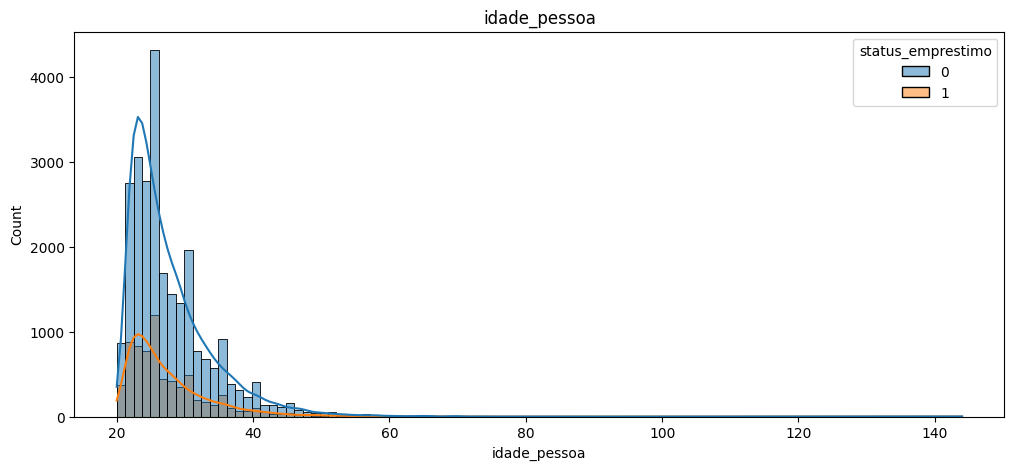

Coluna: renda_pessoa

Quantidade de valores unicos: 4295
Quantidade de valores nulos: 0
Valores que mais se repetem:
renda_pessoa
60000    1046
30000     847
50000     778
40000     658
45000     590
Name: count, dtype: int64
__________________________________________________
Moda: 60000
Est. descritivas:
count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: renda_pessoa, dtype: float64
__________________________________________________


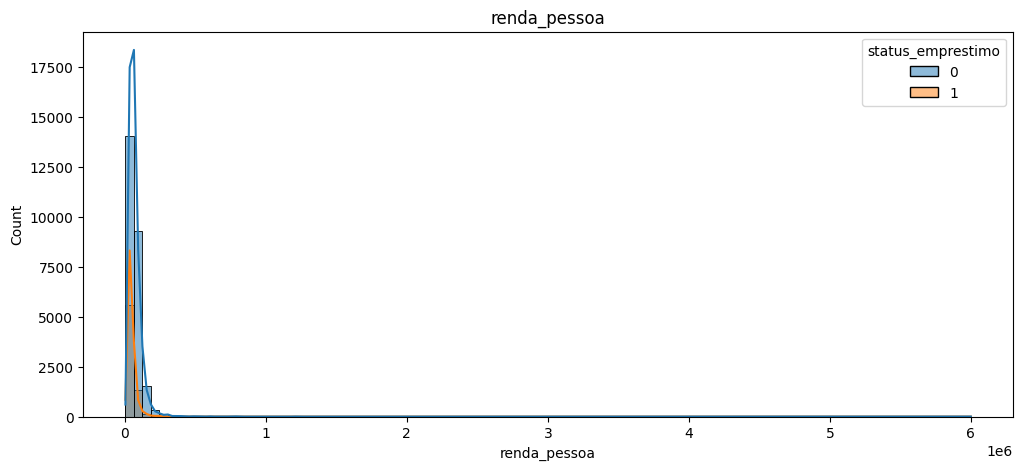

Coluna: propriedade_residencial_pessoa

Quantidade de valores unicos: 4
Quantidade de valores nulos: 0
Valores que mais se repetem:
propriedade_residencial_pessoa
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
__________________________________________________
Moda: RENT
Est. descritivas:
count     32581
unique        4
top        RENT
freq      16446
Name: propriedade_residencial_pessoa, dtype: object
__________________________________________________


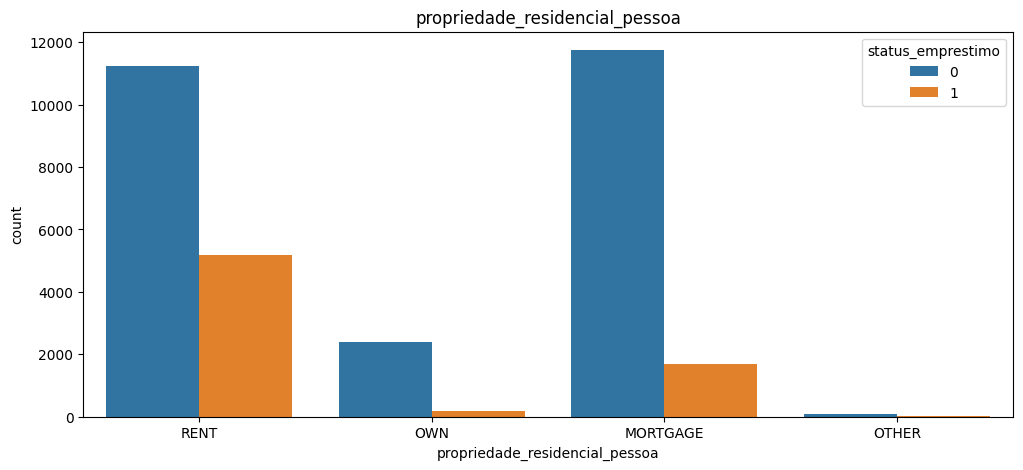

Percentual de saída por categoria:
propriedade_residencial_pessoa
RENT        0.730445
MORTGAGE    0.237760
OWN         0.027153
OTHER       0.004643
Name: count, dtype: float64
Coluna: tempo_emprego_pessoa

Quantidade de valores unicos: 36
Quantidade de valores nulos: 895
Valores que mais se repetem:
tempo_emprego_pessoa
0.0    4105
2.0    3849
3.0    3456
5.0    2946
1.0    2915
Name: count, dtype: int64
__________________________________________________
Moda: 0.0
Est. descritivas:
count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: tempo_emprego_pessoa, dtype: float64
__________________________________________________


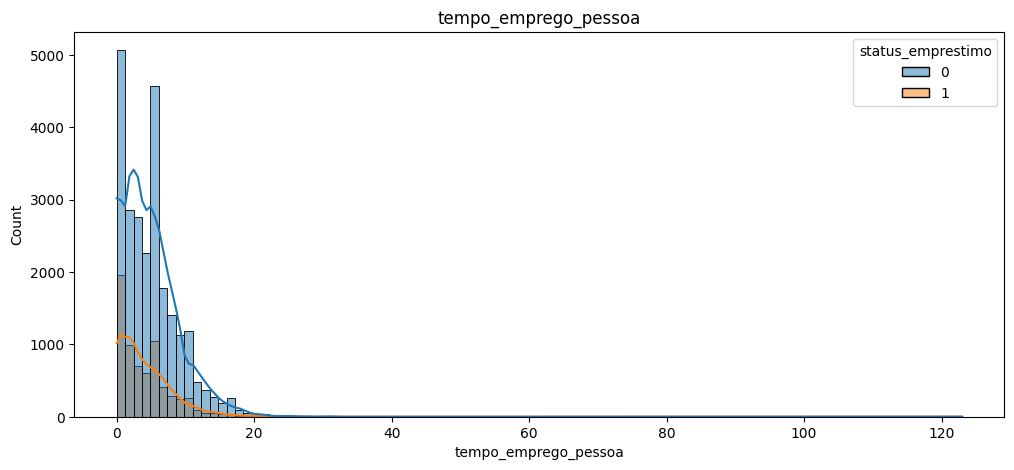

Coluna: intenção_emprestimo

Quantidade de valores unicos: 6
Quantidade de valores nulos: 0
Valores que mais se repetem:
intenção_emprestimo
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
Name: count, dtype: int64
__________________________________________________
Moda: EDUCATION
Est. descritivas:
count         32581
unique            6
top       EDUCATION
freq           6453
Name: intenção_emprestimo, dtype: object
__________________________________________________


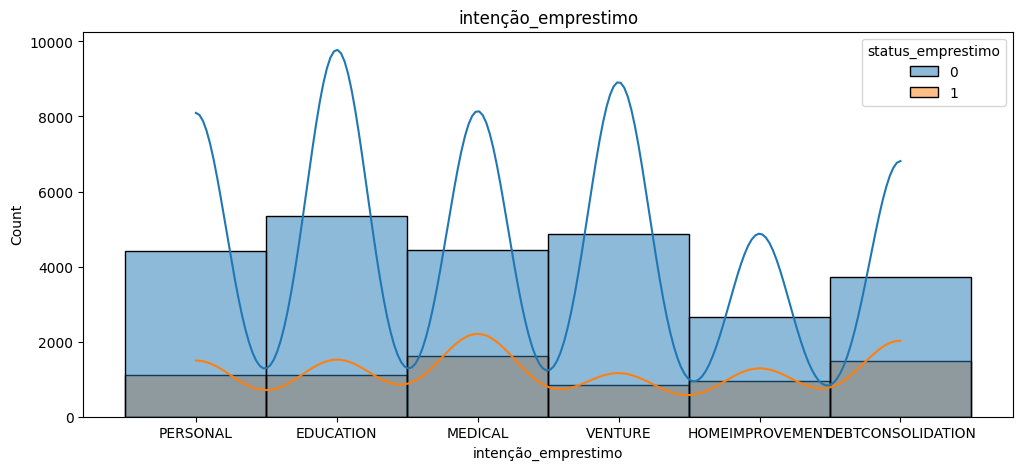

Coluna: grau_emprestimo

Quantidade de valores unicos: 7
Quantidade de valores nulos: 0
Valores que mais se repetem:
grau_emprestimo
A    10777
B    10451
C     6458
D     3626
E      964
Name: count, dtype: int64
__________________________________________________
Moda: A
Est. descritivas:
count     32581
unique        7
top           A
freq      10777
Name: grau_emprestimo, dtype: object
__________________________________________________


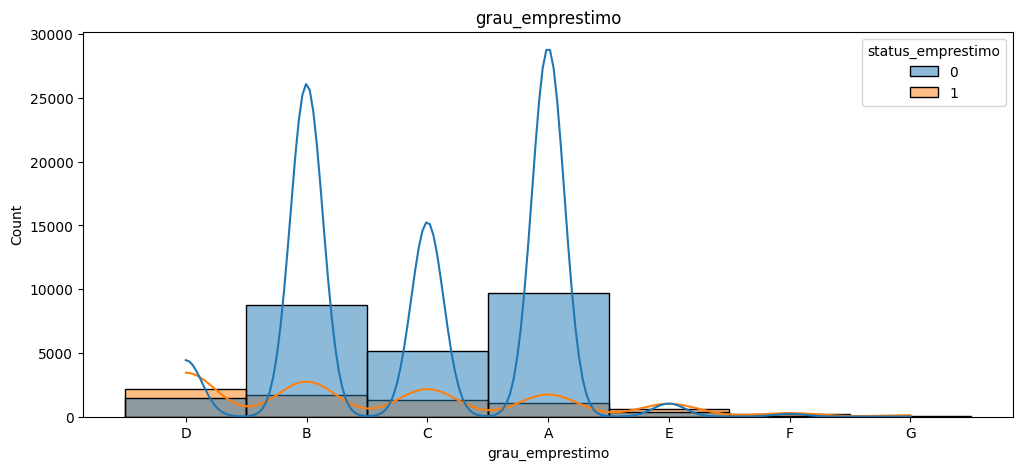

Coluna: valor_emprestimo

Quantidade de valores unicos: 753
Quantidade de valores nulos: 0
Valores que mais se repetem:
valor_emprestimo
10000    2664
5000     2043
12000    1809
6000     1801
15000    1502
Name: count, dtype: int64
__________________________________________________
Moda: 10000
Est. descritivas:
count    32581.000000
mean      9589.371106
std       6322.086646
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: valor_emprestimo, dtype: float64
__________________________________________________


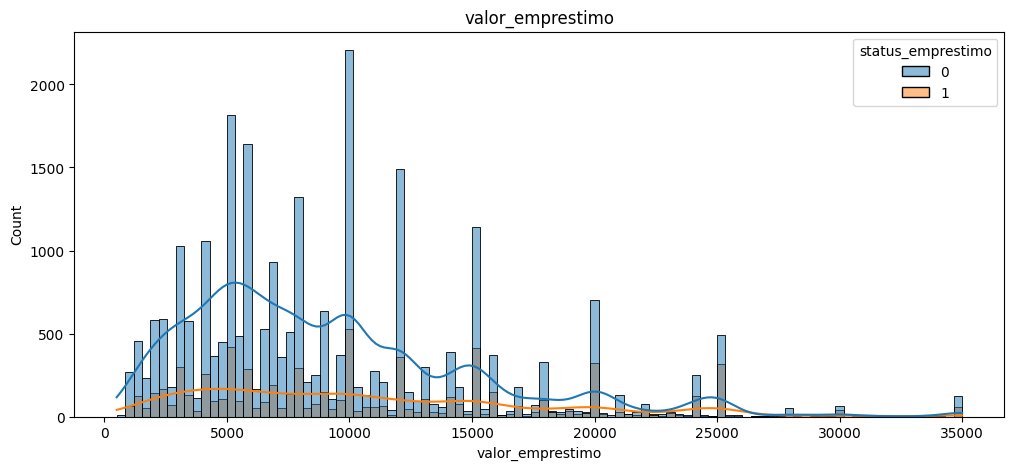

Coluna: taxa_juros_emprestimo

Quantidade de valores unicos: 348
Quantidade de valores nulos: 3116
Valores que mais se repetem:
taxa_juros_emprestimo
7.51     756
10.99    749
7.49     645
7.88     642
5.42     594
Name: count, dtype: int64
__________________________________________________
Moda: 7.51
Est. descritivas:
count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: taxa_juros_emprestimo, dtype: float64
__________________________________________________


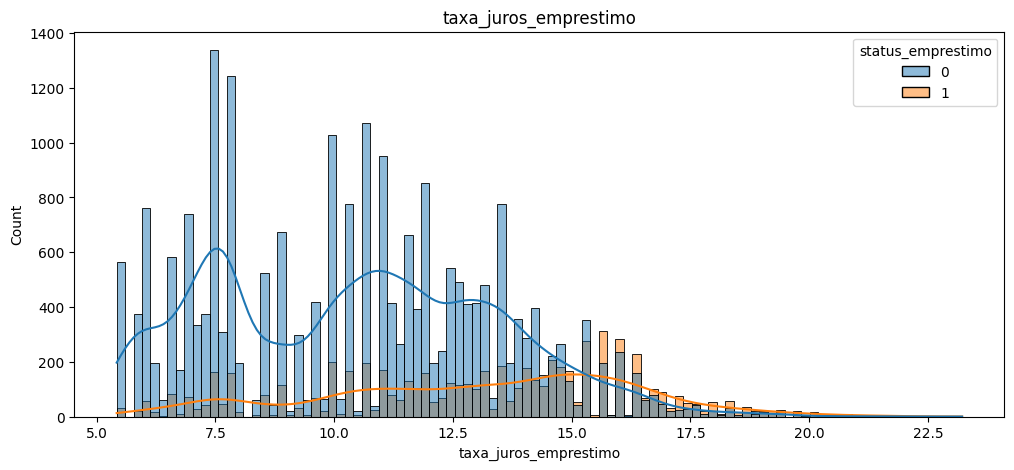

Coluna: status_emprestimo

Quantidade de valores unicos: 2
Quantidade de valores nulos: 0
Valores que mais se repetem:
status_emprestimo
0    25473
1     7108
Name: count, dtype: int64
__________________________________________________
Moda: 0
Est. descritivas:
count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: status_emprestimo, dtype: float64
__________________________________________________


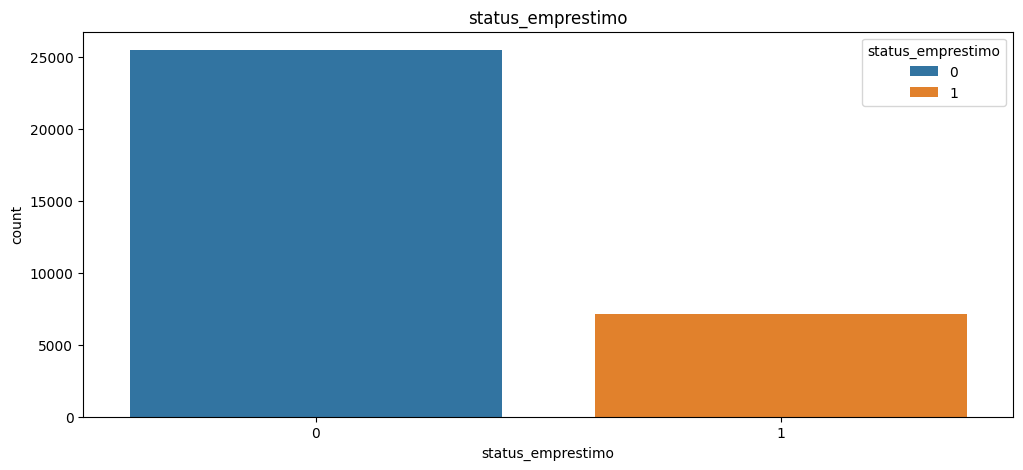

Percentual de saída por categoria:
status_emprestimo
1    1.0
Name: count, dtype: float64
Coluna: percentual_renda_emprestimo

Quantidade de valores unicos: 77
Quantidade de valores nulos: 0
Valores que mais se repetem:
percentual_renda_emprestimo
0.10    1533
0.13    1482
0.08    1437
0.07    1394
0.11    1381
Name: count, dtype: int64
__________________________________________________
Moda: 0.1
Est. descritivas:
count    32581.000000
mean         0.170203
std          0.106782
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: percentual_renda_emprestimo, dtype: float64
__________________________________________________


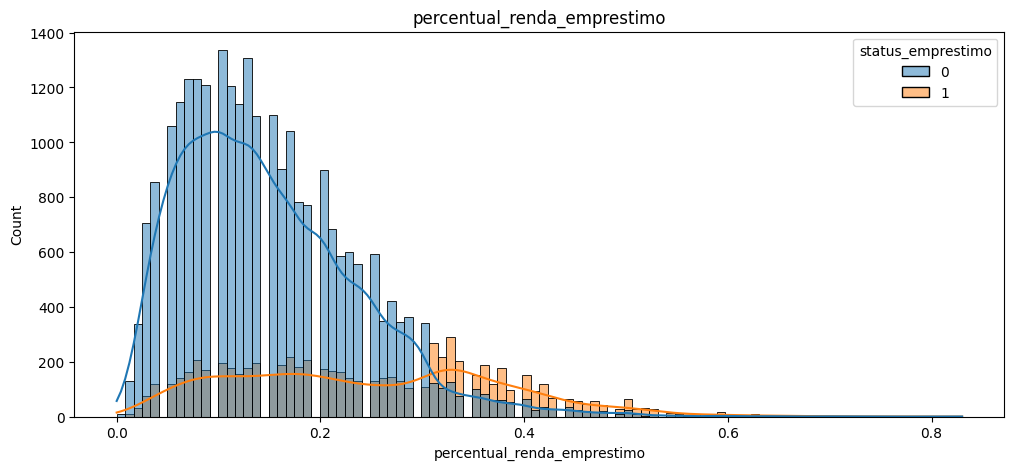

Coluna: pessoa_com_inadimplencia_no_arquivo

Quantidade de valores unicos: 2
Quantidade de valores nulos: 0
Valores que mais se repetem:
pessoa_com_inadimplencia_no_arquivo
N    26836
Y     5745
Name: count, dtype: int64
__________________________________________________
Moda: N
Est. descritivas:
count     32581
unique        2
top           N
freq      26836
Name: pessoa_com_inadimplencia_no_arquivo, dtype: object
__________________________________________________


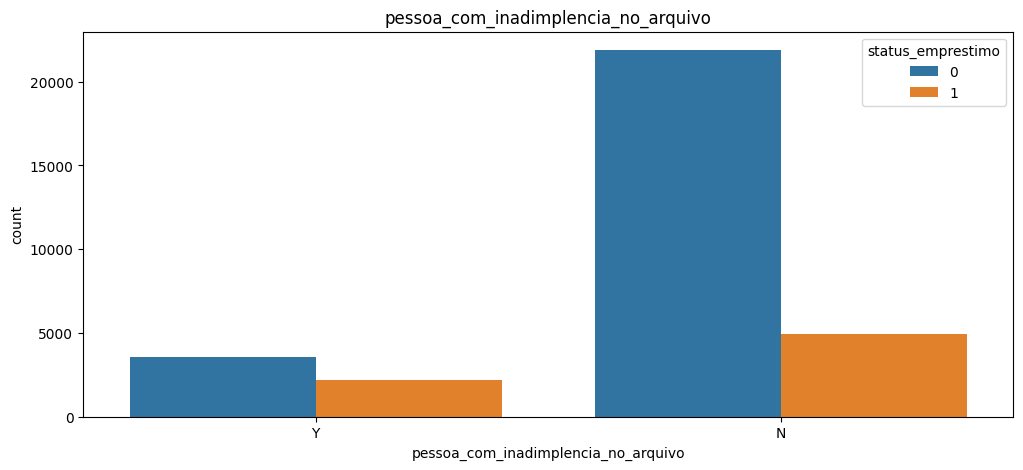

Percentual de saída por categoria:
pessoa_com_inadimplencia_no_arquivo
N    0.694429
Y    0.305571
Name: count, dtype: float64
Coluna: comprimento_historico_credito_pessoa

Quantidade de valores unicos: 29
Quantidade de valores nulos: 0
Valores que mais se repetem:
comprimento_historico_credito_pessoa
2    5965
3    5943
4    5925
8    1902
7    1901
Name: count, dtype: int64
__________________________________________________
Moda: 2
Est. descritivas:
count    32581.000000
mean         5.804211
std          4.055001
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: comprimento_historico_credito_pessoa, dtype: float64
__________________________________________________


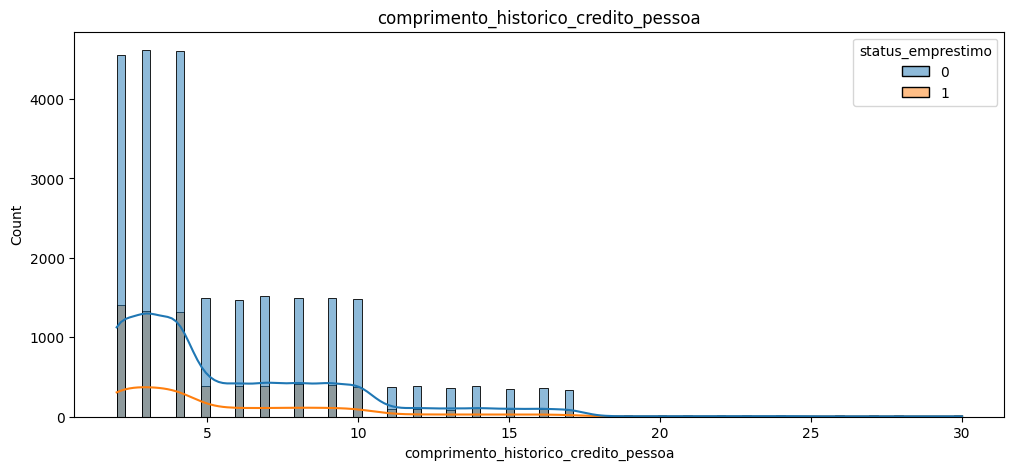

In [254]:
# Criando um loop para exibir analises de todas a s labels
a = 0
b = df.shape[1]
while a < b:
    column_analysis(df.columns[a])
    a += 1

* Existe um outlier significativo na coluna de idade, com um registro de uma pessoa de 144 anos, que pode distorcer a análise e deve ser avaliado.
Relação entre Taxa de Juros e Inadimplência:

* O número de inadimplentes aumenta à medida que a taxa de juros do empréstimo se eleva. Essa relação sugere que taxas mais altas podem dificultar o pagamento.
Percentual da Renda Comprometida:

* A inadimplência também tende a aumentar conforme o percentual da renda comprometida com o empréstimo aumenta. Isso indica que tomadores com uma maior proporção de renda destinada ao pagamento do empréstimo apresentam um risco maior de inadimplência.
Propriedade Residencial e Inadimplência:

* A maioria dos tomadores reside em imóveis alugados (RENT), o que pode estar relacionado a uma maior taxa de inadimplência, dado que esse perfil pode apresentar menor estabilidade financeira.

## Pré-processamento

In [255]:
# Analisando outliers na coluna idade
df[df.idade_pessoa > 100]

,idade_pessoa,renda_pessoa,propriedade_residencial_pessoa,tempo_emprego_pessoa,intenção_emprestimo,grau_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,pessoa_com_inadimplencia_no_arquivo,comprimento_historico_credito_pessoa
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [256]:
# Excluindo idades > 100 e exibindo 5 maiores idades
df.drop(index=df[df.idade_pessoa > 100].index,inplace=True)
df.sort_values(by='idade_pessoa', ascending=False).head(5)

,idade_pessoa,renda_pessoa,propriedade_residencial_pessoa,tempo_emprego_pessoa,intenção_emprestimo,grau_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,pessoa_com_inadimplencia_no_arquivo,comprimento_historico_credito_pessoa
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25


Como as colunas com valores nulos tem dados impactantes para a analise, vou mantes as informções substituindo os valores nulos por -1 para evitar introduzir vies nos dados.

In [257]:
# Substituindo valores nulos por -1
df['tempo_emprego_pessoa'].fillna(-1, inplace=True)
df['taxa_juros_emprestimo'].fillna(-1, inplace=True)

C:\Users\alexm\AppData\Local\Temp\ipykernel_6792\4011492454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego_pessoa'].fillna(-1, inplace=True)
C:\Users\alexm\AppData\Local\Temp\ipykernel_6792\4011492454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [258]:
# Visualizando counas do tipo 'Object'
object_label = df.select_dtypes(include=['object']).columns

for i in object_label:
    print(df[i].value_counts())
    print('*'*50)
    print()

propriedade_residencial_pessoa
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
Name: count, dtype: int64
**************************************************

intenção_emprestimo
EDUCATION            6451
MEDICAL              6071
VENTURE              5717
PERSONAL             5520
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
**************************************************

grau_emprestimo
A    10777
B    10448
C     6456
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
**************************************************

pessoa_com_inadimplencia_no_arquivo
N    26831
Y     5745
Name: count, dtype: int64
**************************************************



In [259]:
# Criando GetDummies para substituir valores de texto
df = pd.get_dummies(df, columns=object_label)
df = df.astype(int)

df.head().T

,0,1,2,3,4
idade_pessoa,22,21,25,23,24
renda_pessoa,59000,9600,9600,65500,54400
tempo_emprego_pessoa,123,5,1,4,8
valor_emprestimo,35000,1000,5500,35000,35000
taxa_juros_emprestimo,16,11,12,15,14
status_emprestimo,1,0,1,1,1
percentual_renda_emprestimo,0,0,0,0,0
comprimento_historico_credito_pessoa,3,2,3,2,4
propriedade_residencial_pessoa_MORTGAGE,0,0,1,0,0
propriedade_residencial_pessoa_OTHER,0,0,0,0,0


In [260]:
df.columns

Index(['idade_pessoa', 'renda_pessoa', 'tempo_emprego_pessoa',
       'valor_emprestimo', 'taxa_juros_emprestimo', 'status_emprestimo',
       'percentual_renda_emprestimo', 'comprimento_historico_credito_pessoa',
       'propriedade_residencial_pessoa_MORTGAGE',
       'propriedade_residencial_pessoa_OTHER',
       'propriedade_residencial_pessoa_OWN',
       'propriedade_residencial_pessoa_RENT',
       'intenção_emprestimo_DEBTCONSOLIDATION',
       'intenção_emprestimo_EDUCATION', 'intenção_emprestimo_HOMEIMPROVEMENT',
       'intenção_emprestimo_MEDICAL', 'intenção_emprestimo_PERSONAL',
       'intenção_emprestimo_VENTURE', 'grau_emprestimo_A', 'grau_emprestimo_B',
       'grau_emprestimo_C', 'grau_emprestimo_D', 'grau_emprestimo_E',
       'grau_emprestimo_F', 'grau_emprestimo_G',
       'pessoa_com_inadimplencia_no_arquivo_N',
       'pessoa_com_inadimplencia_no_arquivo_Y'],
      dtype='object')

## Modelagem

Utilizando modelo XGBoostClassifier para idenficiação de possiveis inadimplentes

c:\Users\alexm\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "depth", "iterations", "random_seed", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\alexm\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "depth", "iterations", "random_seed", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\alexm\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\

Modelo utilizado: XGBClassifier
Acurácia estimada entre: 92.56% e 93.65%
Acurácia real: 93.17%
Percentual de Falsos Positivos: 0.75%
Percentual de Falsos Negativos: 6.08%


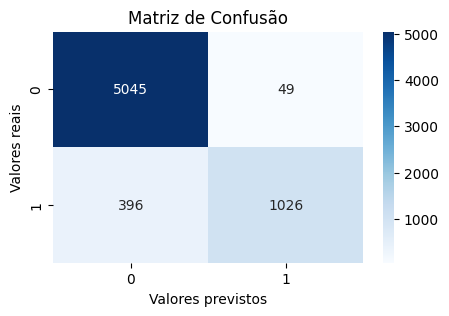

In [261]:
# Separando labels em feature e target
X = df.drop(alvo, axis=1) 
y = df[alvo]

SEED = 10

# Dividindo conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

# Instanciando o modelo
xgbc = XGBClassifier(iterations=500, learning_rate=0.1, depth=6, random_seed=SEED, verbose=0)

# Treinando o modelo e fazendo predições
xgbc.fit(X_train, y_train)
y_predict = xgbc.predict(X_test)

# Calculando a matriz de confusão e pontuação
score = cross_validate(xgbc, X_train, y_train, cv=5)['test_score']
matrix = confusion_matrix(y_test, y_predict)

# Extraindo os valores da matriz de confusão e calculando a acuracy
TN, FP, FN, TP = matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
total = TP + TN + FP + FN
percentual_falsos_positivos = FP / total * 100
percentual_falsos_negativos = FN / total * 100

# Exibindo os resultados
print(f'Modelo utilizado: XGBClassifier')
print(f'Acurácia estimada entre: {score.min()*100:.2f}% e {score.max()*100:.2f}%')
print(f"Acurácia real: {accuracy:.2%}")
print(f'Percentual de Falsos Positivos: {percentual_falsos_positivos:.2f}%')
print(f'Percentual de Falsos Negativos: {percentual_falsos_negativos:.2f}%')

# Visualizando a matriz de confusão
plt.figure(figsize=(5, 3))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('Matriz de Confusão')
plt.show()


Em casos de prevenção de fraudes, é importante reduzir os falsos negativos, mesmo que isso impacte a acurácia final. Para isso, vou aumentar o peso dos falsos negativos usando o parâmetro 'scale_pos_weight' e otimizar os hiperparâmetros com Grid Search.

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Modelo utilizado: XGBClassifier com Grid Search
Melhores parâmetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Acurácia estimada entre: 91.56% e 92.88%
Acurácia real: 92.56%
Percentual de Falsos Positivos: 3.07%
Percentual de Falsos Negativos: 4.37%


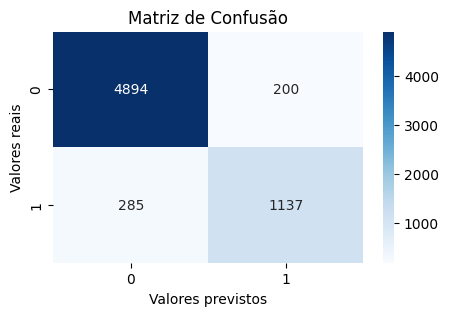

In [262]:
# Calculando a razão de classes para ajustar o peso
num_negativos = sum(y_train == 0)
num_positivos = sum(y_train == 1)
scale_pos_weight = num_negativos / num_positivos

# Definindo o modelo
xgbc = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Definindo os parâmetros a serem otimizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Aplicando o Grid Search
grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Treinando o modelo com o Grid Search
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fazendo previsões com o melhor modelo
y_predict = best_model.predict(X_test)

# Calculando a matriz de confusão e pontuação
score = cross_validate(best_model, X_train, y_train, cv=5)['test_score']
matrix = confusion_matrix(y_test, y_predict)

# Extraindo os valores da matriz de confusão e calculando a acurácia
TN, FP, FN, TP = matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
total = TP + TN + FP + FN
percentual_falsos_positivos = FP / total * 100
percentual_falsos_negativos = FN / total * 100

# Exibindo os resultados
print(f'Modelo utilizado: XGBClassifier com Grid Search')
print(f'Melhores parâmetros: {best_params}')
print(f'Acurácia estimada entre: {score.min()*100:.2f}% e {score.max()*100:.2f}%')
print(f"Acurácia real: {accuracy:.2%}")
print(f'Percentual de Falsos Positivos: {percentual_falsos_positivos:.2f}%')
print(f'Percentual de Falsos Negativos: {percentual_falsos_negativos:.2f}%')

# Visualizando a matriz de confusão
plt.figure(figsize=(5, 3))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('Matriz de Confusão')
plt.show()

# Conclusão e Considerações Finais

Neste projeto, meu foco foi criar um modelo para detectar fraudes, priorizando a redução dos falsos negativos, pois eles podem causar sérios problemas. Ajustei o parâmetro scale_pos_weight para aumentar a sensibilidade do modelo, ajudando a identificar melhor as transações fraudulentas.

Utilizei o Grid Search para otimizar os hiperparâmetros, o que melhorou o desempenho do modelo. Analisei a matriz de confusão para entender como o modelo está se saindo na distinção entre transações legítimas e fraudulentas.